In [3]:
import psutil
import time
import json
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Function to get network statistics
def get_network_stats():
    net_io = psutil.net_io_counters(pernic=True)
    network_stats = {}

    for interface, stats in net_io.items():
        network_stats[interface] = {
            "bytes_sent": stats.bytes_sent,
            "bytes_recv": stats.bytes_recv,
            "packets_sent": stats.packets_sent,
            "packets_recv": stats.packets_recv,
            "errin": stats.errin,
            "errout": stats.errout,
            "dropin": stats.dropin,
            "dropout": stats.dropout
        }
    
    return network_stats

# File to save network data
network_data_filename = "network_data.json"

# Clear the file at the beginning
with open(network_data_filename, "w") as f:
    pass

# Collect and save network data
for _ in range(500):
    data = {
        "timestamp": time.time(),
        "network": get_network_stats()
    }
    with open(network_data_filename, "a") as f:
        f.write(json.dumps(data) + "\n")
    time.sleep(3)
    
print("OK")

KeyboardInterrupt: 

In [26]:
# Load network data
network_data = []
timestamps = []

with open(network_data_filename, 'r') as file:
    for line in file:
        data = json.loads(line)
        timestamps.append(data["timestamp"])
        network_data.append(data["network"])

# Calculate network rates for each interface
network_rates = {}
for interface in network_data[0].keys():
    network_rates[interface] = {
        "bytes_sent_rate": [],
        "bytes_recv_rate": [],
        "packets_sent_rate": [],
        "packets_recv_rate": []
    }
    
    prev_stats = network_data[0][interface]
    for current_stats in network_data[1:]:
        current_stats = current_stats[interface]
        network_rates[interface]["bytes_sent_rate"].append(current_stats["bytes_sent"] - prev_stats["bytes_sent"])
        network_rates[interface]["bytes_recv_rate"].append(current_stats["bytes_recv"] - prev_stats["bytes_recv"])
        network_rates[interface]["packets_sent_rate"].append(current_stats["packets_sent"] - prev_stats["packets_sent"])
        network_rates[interface]["packets_recv_rate"].append(current_stats["packets_recv"] - prev_stats["packets_recv"])
        prev_stats = current_stats

rate_timestamps = timestamps[1:]
print(network_rates)

{'Ethernet': {'bytes_sent_rate': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
# Function to calculate mean and std deviation
def calculate_mean_std(data):
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Function to calculate Z-score with a check for zero std deviation
def calculate_z_scores(data, mean, std):
    if std == 0:
        return np.zeros_like(data)
    z_scores = (data - mean) / std
    return z_scores

# Function to detect anomalies
def detect_anomalies(data, z_scores, threshold):
    anomalies = np.where(np.abs(z_scores) > threshold)[0]
    return anomalies
# Function to get process information by PID
def get_process_info_by_pid(pid):
    try:
        proc = psutil.Process(pid)
        return {
            "pid": pid,
            "name": proc.name(),
            "username": proc.username()
        }
    except psutil.NoSuchProcess:
        print(f"Process with PID {pid} no longer exists.")
        return None
    except psutil.AccessDenied:
        print(f"Access denied to process with PID {pid}.")
        return None
    except psutil.ZombieProcess:
        print(f"Process with PID {pid} is a zombie process.")
        return None

Analyzing interface: Ethernet
Interface Ethernet - Bytes Sent Anomalies Indices: []
Interface Ethernet - Bytes Received Anomalies Indices: []
Interface Ethernet - Packets Sent Anomalies Indices: []
Interface Ethernet - Packets Received Anomalies Indices: []
Detailed Information for Interface Ethernet Anomalies:


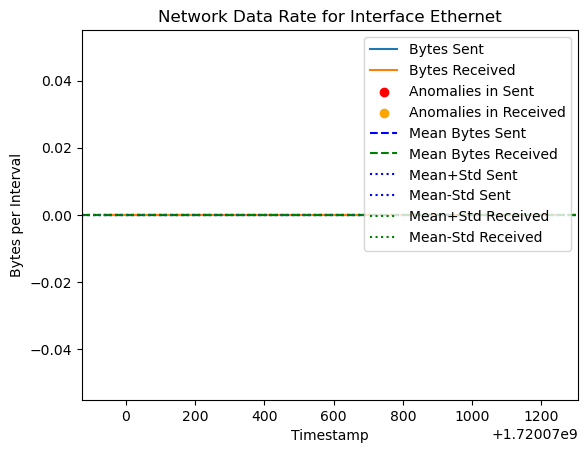

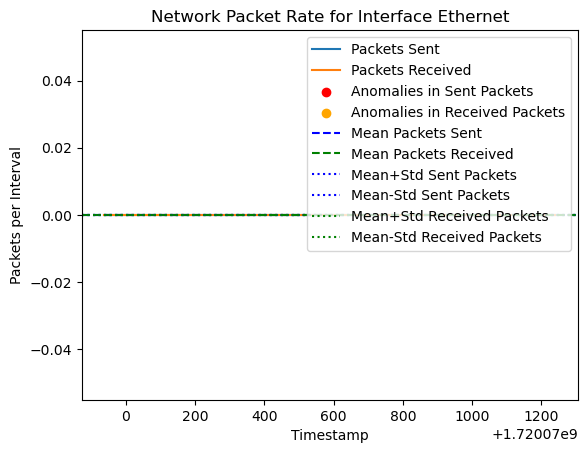

Analyzing interface: Ethernet 2
Interface Ethernet 2 - Bytes Sent Anomalies Indices: []
Interface Ethernet 2 - Bytes Received Anomalies Indices: []
Interface Ethernet 2 - Packets Sent Anomalies Indices: []
Interface Ethernet 2 - Packets Received Anomalies Indices: []
Detailed Information for Interface Ethernet 2 Anomalies:


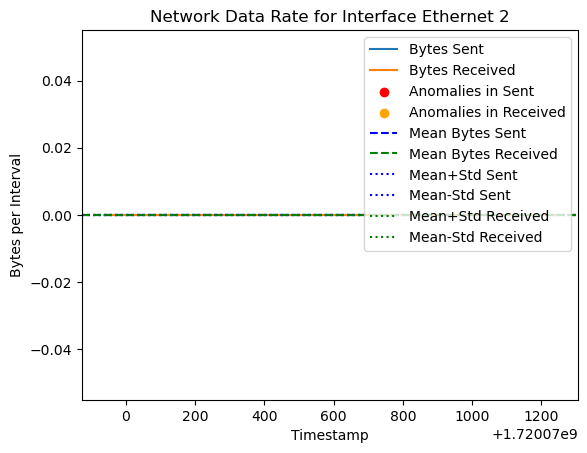

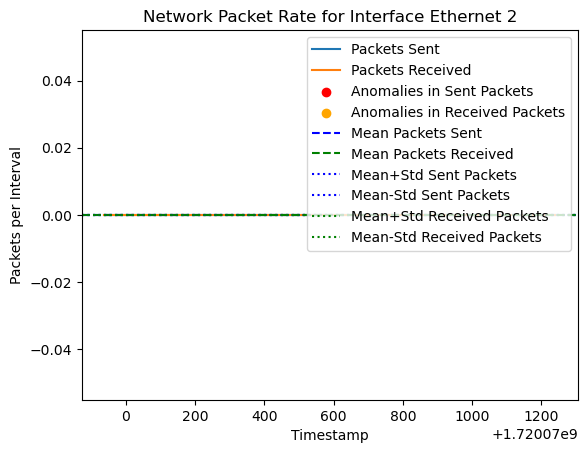

Analyzing interface: Local Area Connection* 1
Interface Local Area Connection* 1 - Bytes Sent Anomalies Indices: []
Interface Local Area Connection* 1 - Bytes Received Anomalies Indices: []
Interface Local Area Connection* 1 - Packets Sent Anomalies Indices: []
Interface Local Area Connection* 1 - Packets Received Anomalies Indices: []
Detailed Information for Interface Local Area Connection* 1 Anomalies:


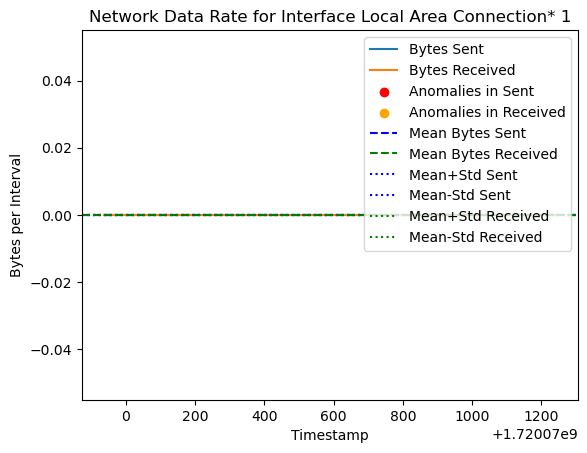

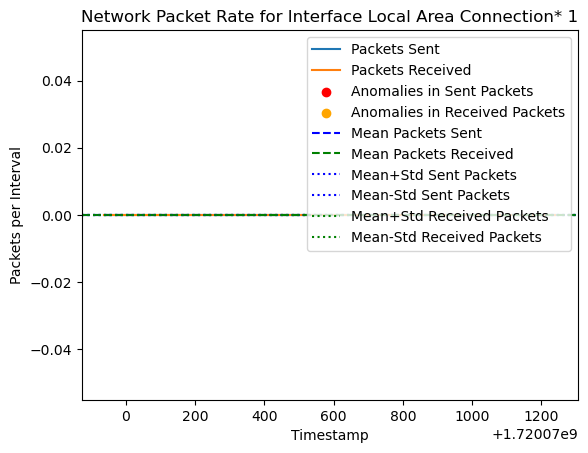

Analyzing interface: Local Area Connection* 2
Interface Local Area Connection* 2 - Bytes Sent Anomalies Indices: []
Interface Local Area Connection* 2 - Bytes Received Anomalies Indices: []
Interface Local Area Connection* 2 - Packets Sent Anomalies Indices: []
Interface Local Area Connection* 2 - Packets Received Anomalies Indices: []
Detailed Information for Interface Local Area Connection* 2 Anomalies:


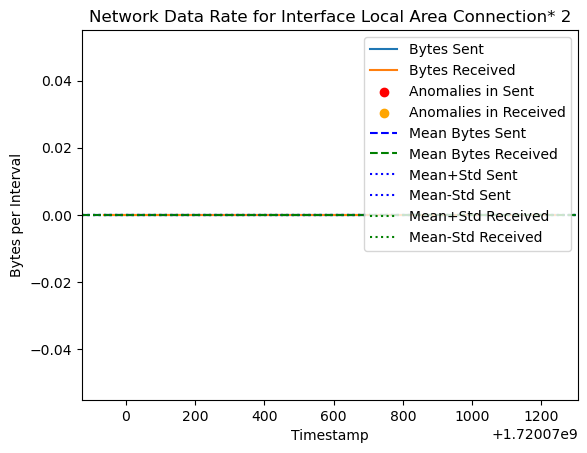

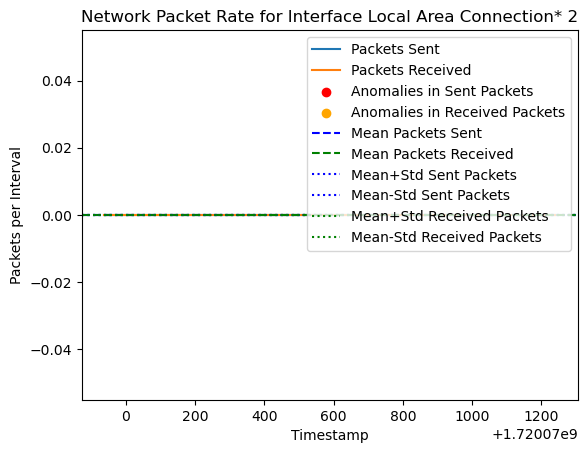

Analyzing interface: Wi-Fi
Interface Wi-Fi - Bytes Sent Anomalies Indices: [ 67  70  71  75  76 315]
Interface Wi-Fi - Bytes Received Anomalies Indices: [ 74  75  76 178 179 180]
Interface Wi-Fi - Packets Sent Anomalies Indices: [ 74  75  76 178]
Interface Wi-Fi - Packets Received Anomalies Indices: [ 74  75  76 178 179 180]
Detailed Information for Interface Wi-Fi Anomalies:
Anomalies in Bytes Sent:
index:  67
process_info:  None
index:  70
process_info:  None
index:  71
process_info:  None
index:  75
process_info:  None
index:  76
process_info:  None
index:  315
process_info:  None
Anomalies in Bytes Received:
index:  74
process_info:  None
index:  75
process_info:  None
index:  76
process_info:  None
index:  178
process_info:  None
index:  179
process_info:  None
index:  180
process_info:  None
Anomalies in Packets Sent:
index:  74
process_info:  None
index:  75
process_info:  None
index:  76
process_info:  None
index:  178
process_info:  None
Anomalies in Packets Received:
index:  

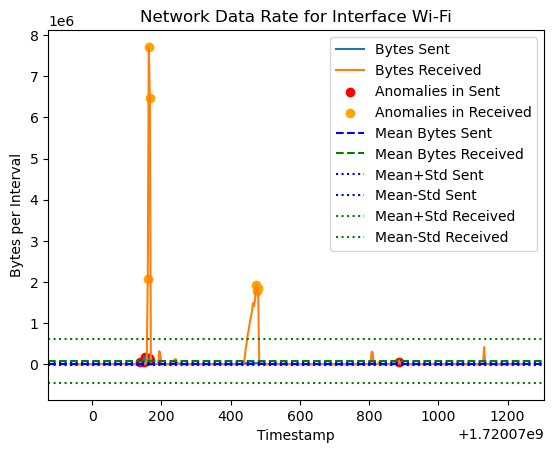

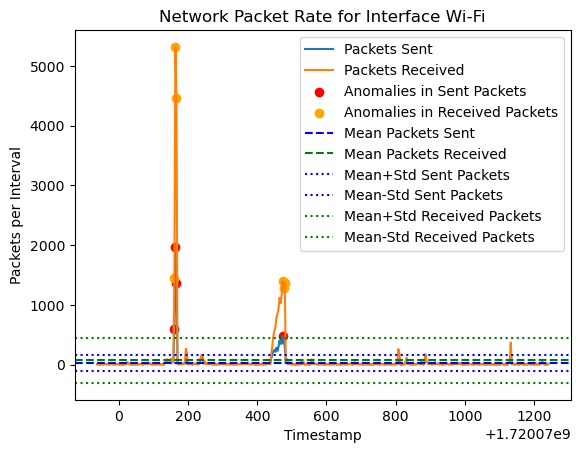

Analyzing interface: Loopback Pseudo-Interface 1
Interface Loopback Pseudo-Interface 1 - Bytes Sent Anomalies Indices: []
Interface Loopback Pseudo-Interface 1 - Bytes Received Anomalies Indices: []
Interface Loopback Pseudo-Interface 1 - Packets Sent Anomalies Indices: []
Interface Loopback Pseudo-Interface 1 - Packets Received Anomalies Indices: []
Detailed Information for Interface Loopback Pseudo-Interface 1 Anomalies:


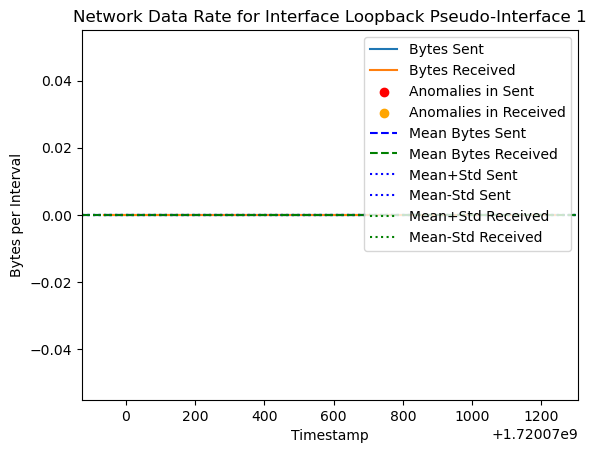

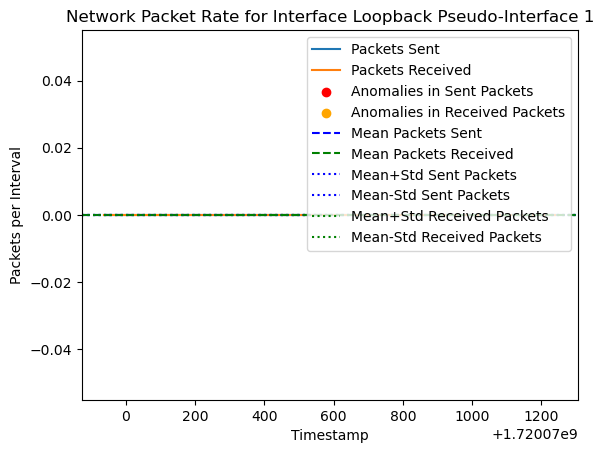

In [38]:
def statistical_method():
    # Process each interface
    for interface, rates in network_rates.items():
        print(f"Analyzing interface: {interface}")

        # Calculate mean and std for each rate
        bytes_sent_mean, bytes_sent_std = calculate_mean_std(rates["bytes_sent_rate"])
        bytes_recv_mean, bytes_recv_std = calculate_mean_std(rates["bytes_recv_rate"])
        packets_sent_mean, packets_sent_std = calculate_mean_std(rates["packets_sent_rate"])
        packets_recv_mean, packets_recv_std = calculate_mean_std(rates["packets_recv_rate"])

        # Calculate Z-scores
        bytes_sent_z_scores = calculate_z_scores(np.array(rates["bytes_sent_rate"]), bytes_sent_mean, bytes_sent_std)
        bytes_recv_z_scores = calculate_z_scores(np.array(rates["bytes_recv_rate"]), bytes_recv_mean, bytes_recv_std)
        packets_sent_z_scores = calculate_z_scores(np.array(rates["packets_sent_rate"]), packets_sent_mean, packets_sent_std)
        packets_recv_z_scores = calculate_z_scores(np.array(rates["packets_recv_rate"]), packets_recv_mean, packets_recv_std)

        # Detect anomalies
        bytes_sent_anomalies = detect_anomalies(rates["bytes_sent_rate"], bytes_sent_z_scores, 3)
        bytes_recv_anomalies = detect_anomalies(rates["bytes_recv_rate"], bytes_recv_z_scores, 3)
        packets_sent_anomalies = detect_anomalies(rates["packets_sent_rate"], packets_sent_z_scores, 3)
        packets_recv_anomalies = detect_anomalies(rates["packets_recv_rate"], packets_recv_z_scores, 3)

        print(f"Interface {interface} - Bytes Sent Anomalies Indices:", bytes_sent_anomalies)
        print(f"Interface {interface} - Bytes Received Anomalies Indices:", bytes_recv_anomalies)
        print(f"Interface {interface} - Packets Sent Anomalies Indices:", packets_sent_anomalies)
        print(f"Interface {interface} - Packets Received Anomalies Indices:", packets_recv_anomalies)

        # Print detailed information for each anomaly index
        print("=" * 50)
        print(f"Detailed Information for Interface {interface} Anomalies:")
        print("=" * 50)

        # Process bytes_sent_anomalies
        if bytes_sent_anomalies.size > 0:
            print(f"Anomalies in Bytes Sent:")
            for idx in bytes_sent_anomalies:
                print("index: ",idx)
                process_info = get_process_info_by_pid(rates["bytes_sent_rate"][idx])
                print("process_info: ",process_info)
                if process_info:
                    print(f"Anomaly at Index {idx}:")

                    print(f"Bytes Sent Rate: {rates['bytes_sent_rate'][idx]}")
                    print("=" * 30)

        # Process bytes_recv_anomalies
        if bytes_recv_anomalies.size>0:
            print(f"Anomalies in Bytes Received:")
            for idx in bytes_recv_anomalies:
                print("index: ",idx)
                process_info = get_process_info_by_pid(rates["bytes_recv_rate"][idx])
                print("process_info: ",process_info)
                if process_info:
                    print(f"Anomaly at Index {idx}:")

                    print(f"Bytes Received Rate: {rates['bytes_recv_rate'][idx]}")
                    print("=" * 30)

        # Process packets_sent_anomalies
        if packets_sent_anomalies.size>0:
            print(f"Anomalies in Packets Sent:")
            for idx in packets_sent_anomalies:
                print("index: ",idx)
                process_info = get_process_info_by_pid(rates["packets_sent_rate"][idx])
                print("process_info: ",process_info)
                if process_info:
                    print(f"Anomaly at Index {idx}:")

                    print(f"Packets Sent Rate: {rates['packets_sent_rate'][idx]}")
                    print("=" * 30)

        # Process packets_recv_anomalies
        if packets_recv_anomalies.size>0:
            print(f"Anomalies in Packets Received:")
            for idx in packets_recv_anomalies:
                print("index: ",idx)
                process_info = get_process_info_by_pid(rates["packets_recv_rate"][idx])
                print("process_info: ",process_info)
                if process_info:
                    print(f"Anomaly at Index {idx}:")

                    print(f"Packets Received Rate: {rates['packets_recv_rate'][idx]}")
                    print("=" * 30)

        # Plot data rates with anomalies
        fig, ax = plt.subplots()
        ax.plot(rate_timestamps, rates["bytes_sent_rate"], label='Bytes Sent')
        ax.plot(rate_timestamps, rates["bytes_recv_rate"], label='Bytes Received')
        ax.scatter(np.array(rate_timestamps)[bytes_sent_anomalies], np.array(rates["bytes_sent_rate"])[bytes_sent_anomalies], color='red', label='Anomalies in Sent')
        ax.scatter(np.array(rate_timestamps)[bytes_recv_anomalies], np.array(rates["bytes_recv_rate"])[bytes_recv_anomalies], color='orange', label='Anomalies in Received')
        ax.axhline(bytes_sent_mean, color='blue', linestyle='--', label='Mean Bytes Sent')
        ax.axhline(bytes_recv_mean, color='green', linestyle='--', label='Mean Bytes Received')
        ax.axhline(bytes_sent_mean + bytes_sent_std, color='blue', linestyle=':', label='Mean+Std Sent')
        ax.axhline(bytes_sent_mean - bytes_sent_std, color='blue', linestyle=':', label='Mean-Std Sent')
        ax.axhline(bytes_recv_mean + bytes_recv_std, color='green', linestyle=':', label='Mean+Std Received')
        ax.axhline(bytes_recv_mean - bytes_recv_std, color='green', linestyle=':', label='Mean-Std Received')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Bytes per Interval')
        ax.set_title(f'Network Data Rate for Interface {interface}')
        ax.legend()
        plt.show()

        fig, ax = plt.subplots()
        ax.plot(rate_timestamps, rates["packets_sent_rate"], label='Packets Sent')
        ax.plot(rate_timestamps, rates["packets_recv_rate"], label='Packets Received')
        ax.scatter(np.array(rate_timestamps)[packets_sent_anomalies], np.array(rates["packets_sent_rate"])[packets_sent_anomalies], color='red', label='Anomalies in Sent Packets')
        ax.scatter(np.array(rate_timestamps)[packets_recv_anomalies], np.array(rates["packets_recv_rate"])[packets_recv_anomalies], color='orange', label='Anomalies in Received Packets')
        ax.axhline(packets_sent_mean, color='blue', linestyle='--', label='Mean Packets Sent')
        ax.axhline(packets_recv_mean, color='green', linestyle='--', label='Mean Packets Received')
        ax.axhline(packets_sent_mean + packets_sent_std, color='blue', linestyle=':', label='Mean+Std Sent Packets')
        ax.axhline(packets_sent_mean - packets_sent_std, color='blue', linestyle=':', label='Mean-Std Sent Packets')
        ax.axhline(packets_recv_mean + packets_recv_std, color='green', linestyle=':', label='Mean+Std Received Packets')
        ax.axhline(packets_recv_mean - packets_recv_std, color='green', linestyle=':', label='Mean-Std Received Packets')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Packets per Interval')
        ax.set_title(f'Network Packet Rate for Interface {interface}')
        ax.legend()
        plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

def extract_features(network_rates):
    features = []
    for interface, rates in network_rates.items():
        combined_rates = np.array([rates["bytes_sent_rate"],
                                   rates["bytes_recv_rate"],
                                   rates["packets_sent_rate"],
                                   rates["packets_recv_rate"]]).T
        features.append(combined_rates)
    return np.concatenate(features)

# Extract and normalize features
features = extract_features(network_rates)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [55]:
from sklearn.ensemble import IsolationForest

# Preprocess data for Isolation Forest
def preprocess_data_for_isolation_forest(rates):
    features = []
    for i in range(len(rates["bytes_sent_rate"])):
        feature_vector = [
            rates["bytes_sent_rate"][i],
            rates["bytes_recv_rate"][i],
            rates["packets_sent_rate"][i],
            rates["packets_recv_rate"][i]
        ]
        features.append(feature_vector)
    return np.array(features)

# Function to get process info based on network connections
def get_process_info_by_connections():
    process_connections = {}
    for conn in psutil.net_connections(kind='inet'):
        pid = conn.pid
        if pid is None:
            continue
        try:
            proc = psutil.Process(pid)
            name = proc.name()
            if pid not in process_connections:
                process_connections[pid] = {
                    "name": name,
                    "username": proc.username(),
                    "connections": []
                }
            process_connections[pid]["connections"].append({
                "laddr": conn.laddr,
                "raddr": conn.raddr,
                "status": conn.status
            })
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            continue
    return process_connections


Analyzing interface: Ethernet
Isolation Forest Anomalies Indices for Ethernet: []


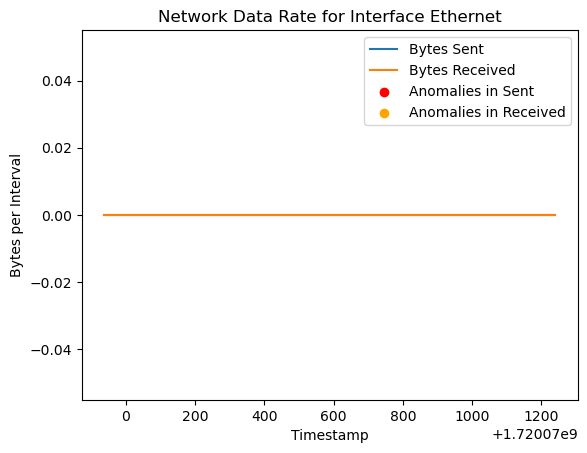

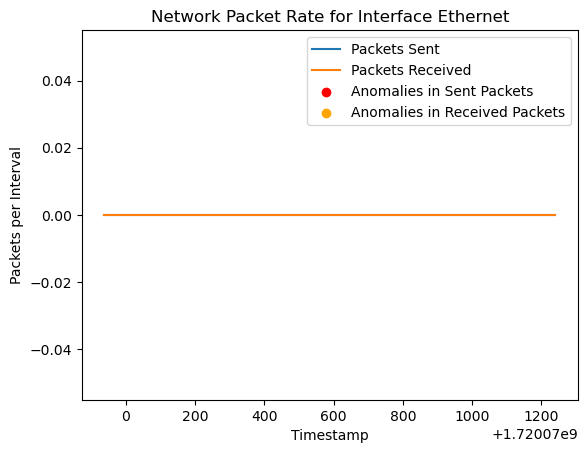

Analyzing interface: Ethernet 2
Isolation Forest Anomalies Indices for Ethernet 2: []


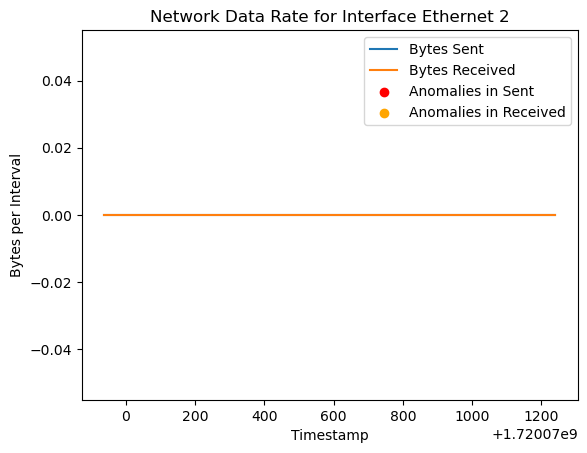

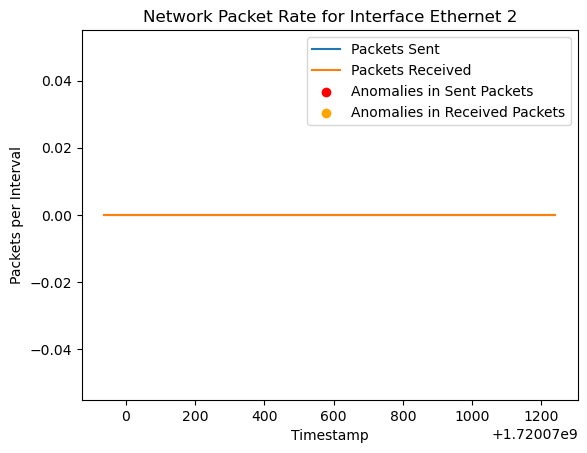

Analyzing interface: Local Area Connection* 1
Isolation Forest Anomalies Indices for Local Area Connection* 1: []


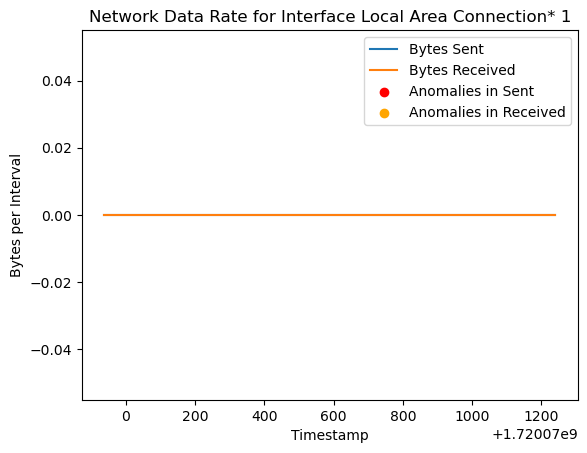

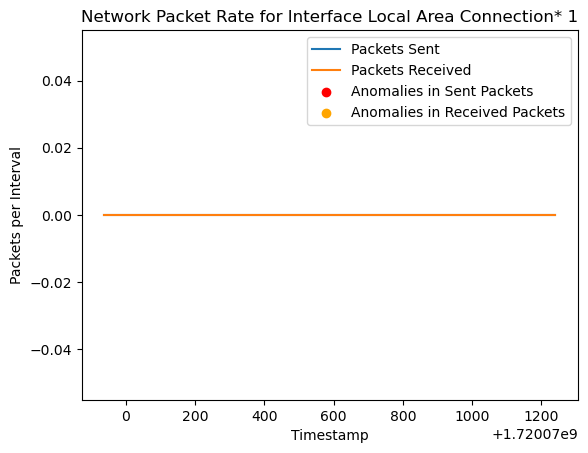

Analyzing interface: Local Area Connection* 2
Isolation Forest Anomalies Indices for Local Area Connection* 2: []


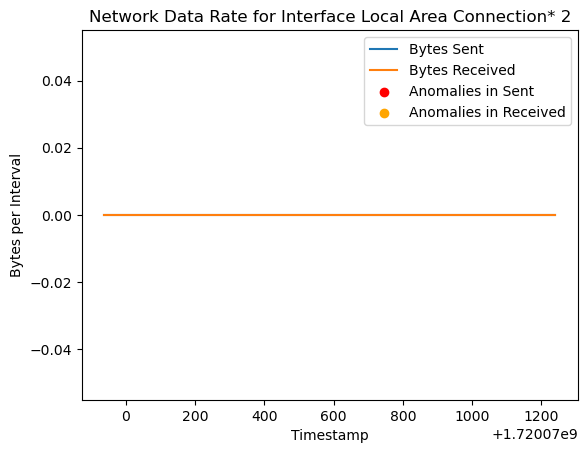

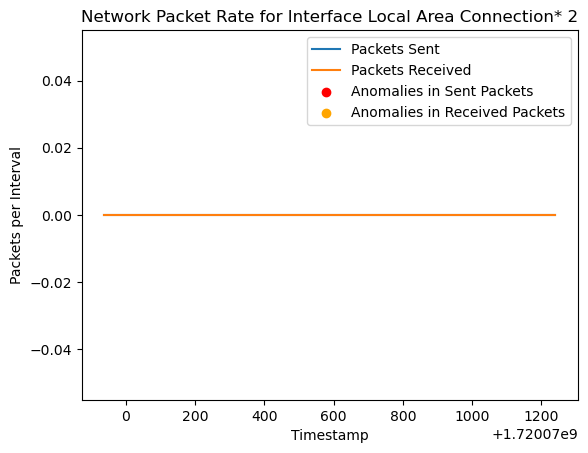

Analyzing interface: Wi-Fi
Isolation Forest Anomalies Indices for Wi-Fi: [ 71  74  75  76 178]
Anomalies in Wi-Fi:
index:  71
process_info:  {0: {'name': 'System Idle Process', 'username': 'NT AUTHORITY\\SYSTEM', 'connections': [{'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64464), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65137), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65255), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64983), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64779), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65073), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64752), 'status': 'TIME_WA

process_info:  {0: {'name': 'System Idle Process', 'username': 'NT AUTHORITY\\SYSTEM', 'connections': [{'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65137), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64464), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65255), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64983), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64779), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65073), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64752), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64603), 'status': 'TIME_WAIT'}, {'laddr':

process_info:  {0: {'name': 'System Idle Process', 'username': 'NT AUTHORITY\\SYSTEM', 'connections': [{'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=49419), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65137), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65255), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64983), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64779), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65073), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64752), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64603), 'status': 'TIME_WAIT'}, {'laddr':

process_info:  {0: {'name': 'System Idle Process', 'username': 'NT AUTHORITY\\SYSTEM', 'connections': [{'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=49419), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65137), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65255), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64983), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64779), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65073), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64752), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64603), 'status': 'TIME_WAIT'}, {'laddr':

process_info:  {0: {'name': 'System Idle Process', 'username': 'NT AUTHORITY\\SYSTEM', 'connections': [{'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=49419), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65137), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65255), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64983), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64779), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=65073), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64752), 'status': 'TIME_WAIT'}, {'laddr': addr(ip='127.0.0.1', port=52899), 'raddr': addr(ip='127.0.0.1', port=64603), 'status': 'TIME_WAIT'}, {'laddr':

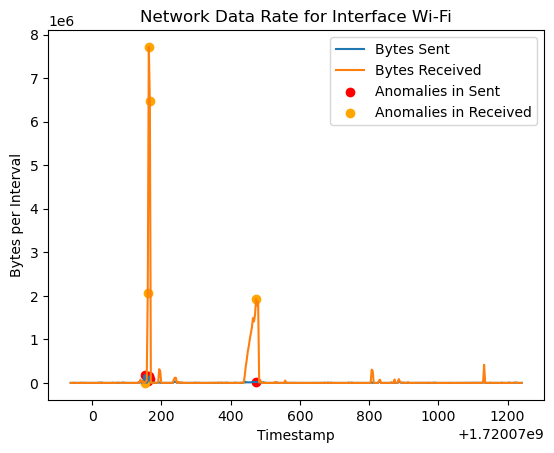

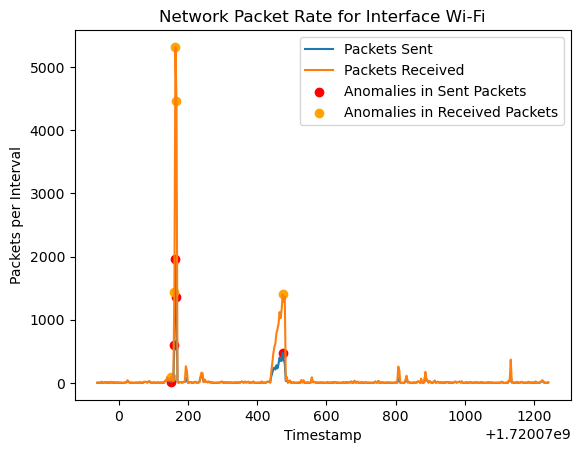

Analyzing interface: Loopback Pseudo-Interface 1
Isolation Forest Anomalies Indices for Loopback Pseudo-Interface 1: []


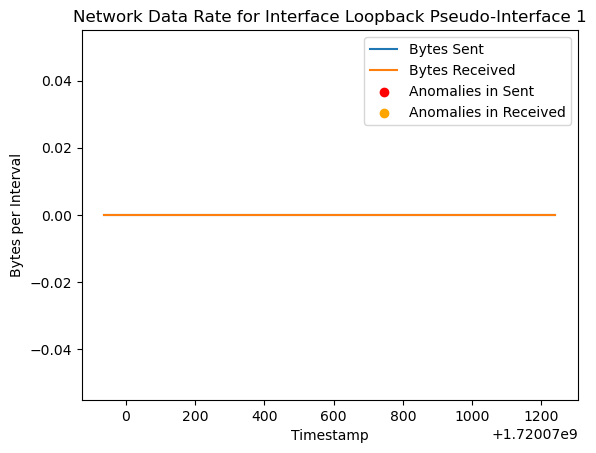

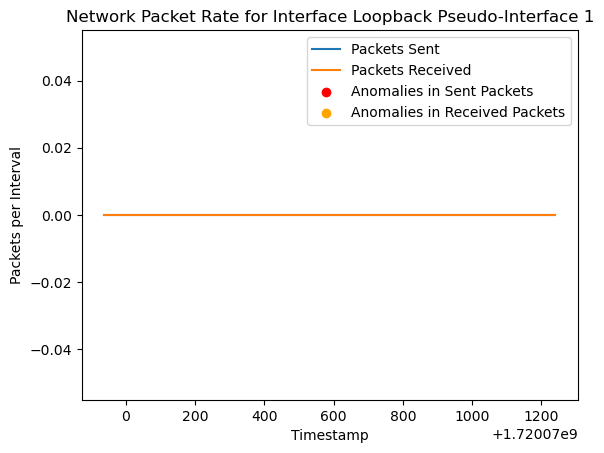

In [56]:
# Apply Isolation Forest to each interface
for interface, rates in network_rates.items():
    print(f"Analyzing interface: {interface}")

    # Preprocess the data
    features = preprocess_data_for_isolation_forest(rates)
    
    # Normalize the features
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)

    # Fit Isolation Forest
    isolation_forest = IsolationForest(contamination=0.01)
    isolation_forest.fit(normalized_features)

    # Predict anomalies
    iso_forest_anomalies = isolation_forest.predict(normalized_features)
    anomaly_indices = np.where(iso_forest_anomalies == -1)[0]
    
    print(f"Isolation Forest Anomalies Indices for {interface}:", anomaly_indices)

    # Get process information for anomalies
    if len(anomaly_indices) > 0:
        print(f"Anomalies in {interface}:")
        for idx in anomaly_indices:
            print("index: ",idx)
            process_info = get_process_info_by_connections()
            print("process_info: ",process_info)
            if process_info:
                print(f"Anomaly at Index {idx}:")
                print(f"Bytes Sent Rate: {rates['bytes_sent_rate'][idx]}")
                print(f"Bytes Received Rate: {rates['bytes_recv_rate'][idx]}")
                print(f"Packets Sent Rate: {rates['packets_sent_rate'][idx]}")
                print(f"Packets Received Rate: {rates['packets_recv_rate'][idx]}")
                print("=" * 30)

    # Plot data rates with anomalies
    fig, ax = plt.subplots()
    ax.plot(rate_timestamps, rates["bytes_sent_rate"], label='Bytes Sent')
    ax.plot(rate_timestamps, rates["bytes_recv_rate"], label='Bytes Received')
    ax.scatter(np.array(rate_timestamps)[anomaly_indices], np.array(rates["bytes_sent_rate"])[anomaly_indices], color='red', label='Anomalies in Sent')
    ax.scatter(np.array(rate_timestamps)[anomaly_indices], np.array(rates["bytes_recv_rate"])[anomaly_indices], color='orange', label='Anomalies in Received')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Bytes per Interval')
    ax.set_title(f'Network Data Rate for Interface {interface}')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(rate_timestamps, rates["packets_sent_rate"], label='Packets Sent')
    ax.plot(rate_timestamps, rates["packets_recv_rate"], label='Packets Received')
    ax.scatter(np.array(rate_timestamps)[anomaly_indices], np.array(rates["packets_sent_rate"])[anomaly_indices], color='red', label='Anomalies in Sent Packets')
    ax.scatter(np.array(rate_timestamps)[anomaly_indices], np.array(rates["packets_recv_rate"])[anomaly_indices], color='orange', label='Anomalies in Received Packets')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Packets per Interval')
    ax.set_title(f'Network Packet Rate for Interface {interface}')
    ax.legend()
    plt.show()